* linear model: [y = ax + b]
* A target variable, also called the dependent variable or the y variable.
* Independent variables, also known as x variables or explanatory variables.
* 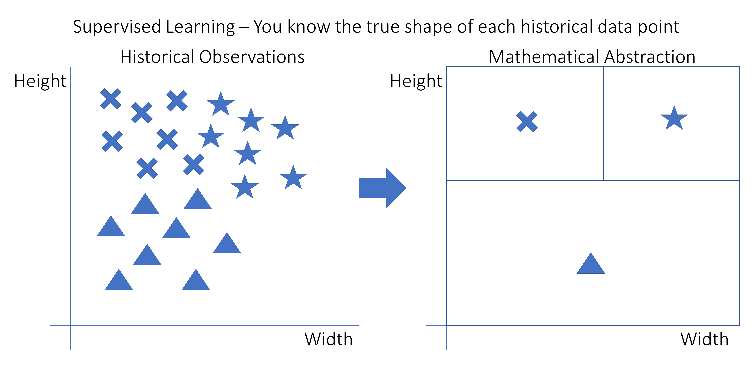 
* In this case, observations marked with a cross are tall but not wide. Stars are both tall and wide. Triangles are short but can be wide or narrow.
* *Note*: In unsupervised models, you don’t have a split between target variables and independent variables. Unsupervised learning tries to group data points by evaluating their similarity.
* 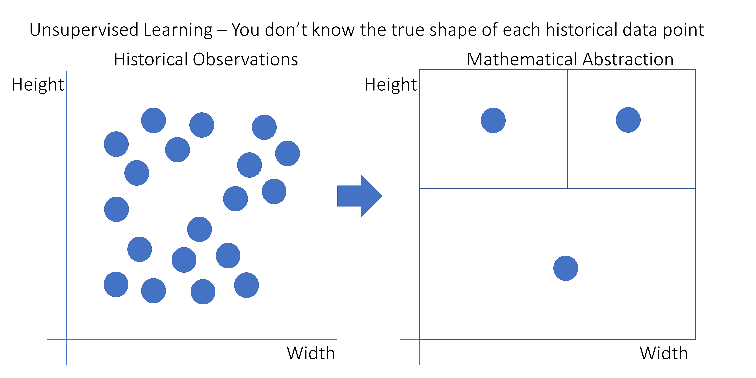
* In this graph, the observations don’t have different shapes anymore. They’re all circles. Yet they can still be grouped into three groups based on the distance between points. (there are three clusters of points that can be separated based on the empty space between them)

# KNN

* 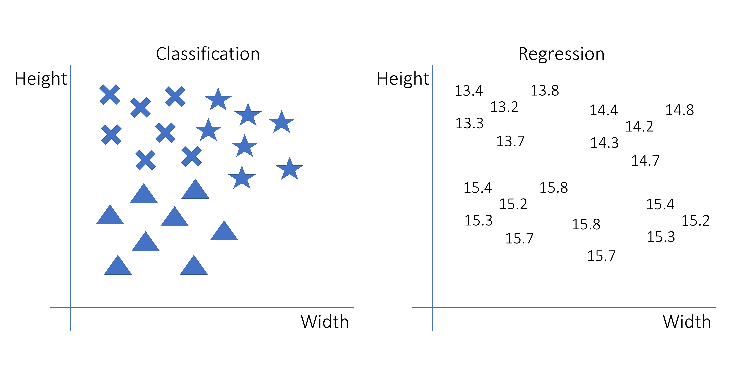

1. **Classification** is a prediction task with a categorical target variable. Classification models learn how to classify any new observation. This assigned class can be either right or wrong, not in between. A classic example of classification is the *iris dataset*, in which you use physical measurements of plants to predict their species. A famous algorithm that can be used for classification is *logistic regression*.

2. **Regression** is a prediction task in which the target variable is numeric. A famous example of regression is the *Housing Prices Challenge on Kaggle*. In this machine learning contest, participants try to predict the sales prices of houses based on numerous independent variables.

# The Abalone Problem Statement

The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

You’ll be applying a kNN to find the closest prediction score possible.

import pandas & dataset

In [30]:
import pandas as pd

url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
)

abalone = pd.read_csv(url, header = None)

abalone.head() # This shows the first five lines of the Abalone Dataset, imported in Python as a pandas DataFrame.

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* Column names are missing
* Adding column names in the DataFrame

In [31]:
abalone.columns = [ "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]

abalone[4:10]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


delete sex column, as goal is prediction through physical measurements

In [32]:
abalone = abalone.drop("Sex", axis = 1)

abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


graph (histogram) for rings(target var.)

* histogram with fifteen bins
* decision to use fifteen bins is based on a few trials
* When defining the number of bins, you generally try to have neither too many observations per bin nor too few
* Too few bins can hide certain patterns, while too many bins can make the histogram lack smoothness

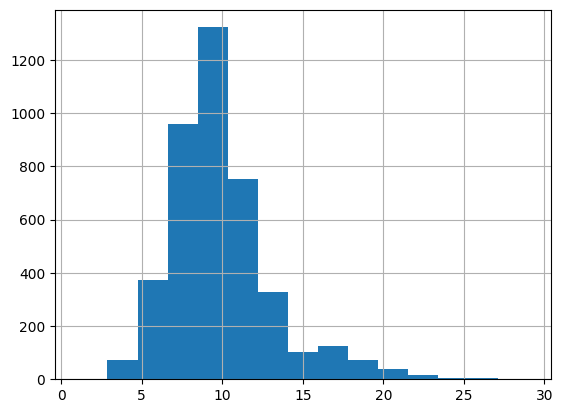

In [50]:
import matplotlib.pyplot as plt

abalone["Rings"].hist(bins = 15)
plt.show()

* histogram shows that most abalones in the dataset have between five and fifteen rings
* but that it’s possible to get up to twenty-five rings
* older abalones are underrepresented in this dataset
* if any, have a strong correlation with the age
* A strong correlation between an independent variable and your goal variable would be a good sign, as this would confirm that physical measurements and age are related.

* correlation matrix

In [51]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

* corr. coeffs. for Rings with the other vars. The closer they are to 1, the more corr. there is.
* conclusion: there’s at least some correlation between physical measurements of adult abalones and their age, yet it’s also not very high
* Very high correlations mean that you can expect a straightforward modeling process. In this case, you’ll have to try and see what results you can obtain using the kNN algorithm.

* The specificity of the k-Nearest Neighbors algorithm is that this formula is computed not at the moment of fitting but rather at the moment of prediction. (which isn’t the case for most other models)
* Ex- Your neighbors are often relatively similar to you. They’re probably in the same socioeconomic class as you. Maybe they have the same type of work as you, maybe their children go to the same school as yours, and so on. But for some tasks, this kind of approach is not as useful. For instance, it wouldn’t make any sense to look at your neighbor’s favorite color to predict yours.

Nearest Distance (Euclidean Distance)

* 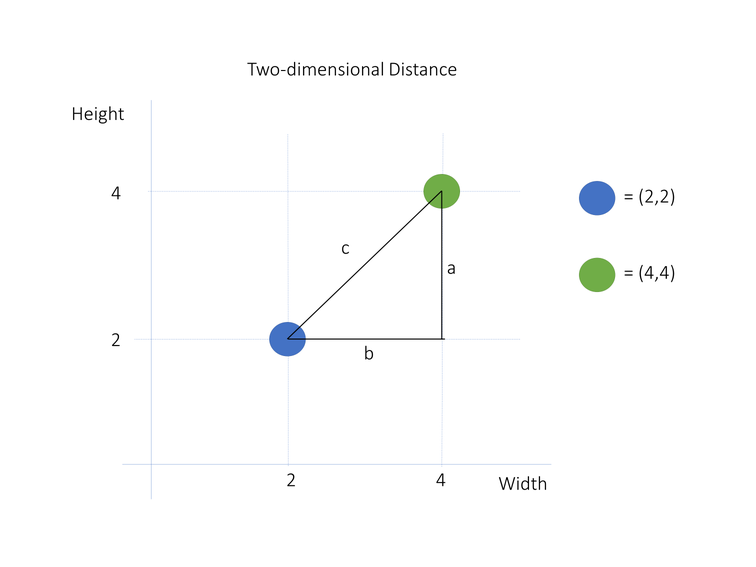
* The difference between these vectors is the vector c, which goes from the head of vector a to the head of vector b. The length of vector c represents the distance between your two data points
* The length of a vector is called the norm. The norm is a positive value that indicates the magnitude of the vector
* 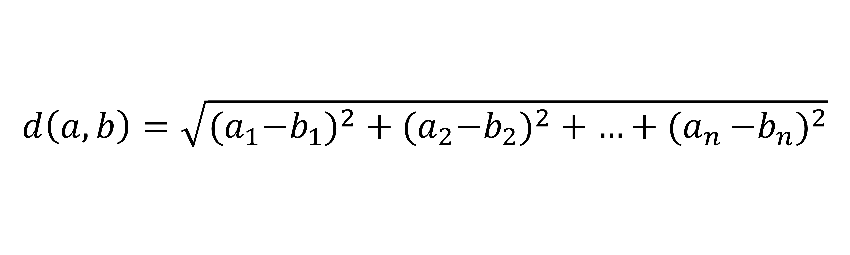

compute the distance between them by computing the norm of the difference vector

In [54]:
# Ex-

import numpy as np

a = np.array([2, 2])
b = np.array([4, 4])

np.linalg.norm(a - b)

2.8284271247461903

find the k nearest neighbors

* find a number of neighbors, and that number is given by k. The minimum value of k is 1. This means using only one neighbor for the prediction. The maximum is the number of data points that you have. This means using all neighbors. The value of k is something that the user defines.

In [53]:
X = abalone.drop("Rings", axis = 1)
X = X.values
y = abalone["Rings"]
y = y.values

* k = 3
* new abalone (data point)

In [55]:
new_data_point = np.array([
    0.569552, # length
    0.446407, # diameter
    0.154437, # height
    1.016849, # Whole weight
    0.439051, # Shucked weight
    0.222526, # Viscera weight
    0.291208  # Shell weight
])

In [56]:
# compute the distances between this new data point and each of the data points

distances = np.linalg.norm(X - new_data_point, axis = 1)

finding 3 closest neighbors

* find the IDs of the minimum distances
* use a method called .argsort() to sort the array from lowest to highest

In [57]:
k = 3
nearest_neighbors_ids = distances.argsort()[ :k]
nearest_neighbors_ids

array([4045, 1902, 1644], dtype=int64)

find the ground truths for those three neighbors

In [58]:
nearest_neighbors_rings = y[nearest_neighbors_ids]
nearest_neighbors_rings

array([ 9, 11, 10], dtype=int64)

* combine the values of those 3 neighbors into a prediction for your new data point
* combining the neighbors into a prediction works differently for regression and classification

**Avg. for Reg.**

* the target variable is numeric
* combine multiple neighbors into one prediction by taking the average of their values of the target variable

In [60]:
prediction = nearest_neighbors_rings.mean()
prediction

10.0

* This means that the 3-Nearest Neighbor prediction for your new data point is 10

**mode for classification**

* the target variable is categorical
* we can’t take averages on categorical variables
* So we you take the *mode*
* MODE => (the value that occurs most often) we count the classes of all the neighbors, and we retain the most common class. The prediction is the value that occurs most often among the neighbors.
* multiple modes, there are multiple possible solutions
* compute the mode using the *statistics.mode()* function
* abalone example is not a case of classification

In [62]:
# Ex- 

import statistics

class_neighbors = np.array(["A", "B", "B", "C"])
statistics.mode(class_neighbors)

'B'

Splitting Data Into Training and Test Sets for Model Evaluation

* **Training data** is used to fit the model. For kNN, this means that the training data will be used as neighbors.
* **Test data** is used to evaluate the model. It means that you’ll make predictions for the number of rings of each of the abalones in the test data and compare those results to the known true number of rings.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 12345)

* Where,

1. *test_size* refers to the number of observations that you want to put in the training data and the test data. If you specify a *test_size* of 0.2, your *test_size* will be 20 percent of the original data, therefore leaving the other 80 percent as training data.

2. *random_state* is a parameter that allows you to obtain the same results every time the code is run. *train_test_split()* makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use *random_state*. The choice of value in *random_state* is arbitrary.

fit a knn regressor

* start by creating a model of the correct class
* choose the values for hyperparameters
* choose the value for k, which is called n_neighbors in the scikit-learn

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)

* create an unfitted model with knn_model
* model will use the three nearest neighbors to predict the value of a future data point
* To get the data into the model, you can then fit the model on the training dataset

In [65]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

* Using .fit(), we let the model learn from the data
* Now, knn_model contains everything that’s needed to make predictions on new abalone data points

evaluate the fit

* evaluation metrics available for regression => root-mean-square error (RMSE)

* RMSE of a prediction is computed as follows:
1. Compute the difference between each data point’s actual value and predicted value.
2. For each difference, take the square of this difference.
3. Sum all the squared differences.
4. Take the square root of the summed value. 

evaluate the prediction error on the training data. This means that you use the training data for prediction, so you know that the result should be relatively good

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [69]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

* We can observe a relatively large difference between the RMSE on the training data and the RMSE on the test data. This means that the model suffers from overfitting on the training data: It does not generalize well.

plot the fit of the model

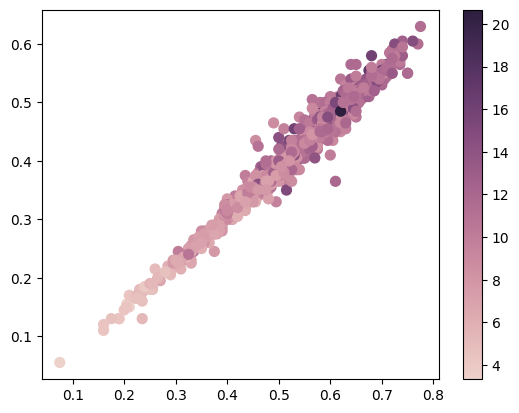

In [70]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap = True)
f, ax = plt.subplots()
points = ax.scatter( X_test[:, 0],X_test[:, 1], c = test_preds, s = 50, cmap = cmap )
f.colorbar(points)
plt.show()

* each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, respectively
* color of the point reflects the predicted age
*  longer and larger an abalone is, the higher its predicted age (This is logical, and it’s a positive sign. It means that your model is learning something that seems correct.)
* To confirm whether this trend exists in actual abalone data, you can do the same for the actual values by simply replacing the variable that is used for c:

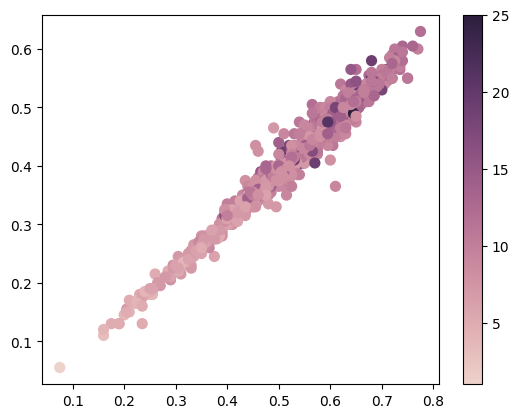

In [71]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter( X_test[:, 0], X_test[:, 1], c = y_test, s = 50, cmap = cmap )
f.colorbar(points)
plt.show()

* This confirms that the trend your model is learning does indeed make sense.